## Load CIFAR-10 dataset

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0])
print(y_train[0])

(50000, 32, 32, 3)
(50000, 10)
[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6

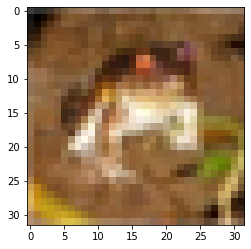

In [3]:
import matplotlib.pyplot as plt

img = x_train[0]
plt.imshow(img)

## Create Model

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(200, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(50, activation = 'relu'),    
    Dense(10, activation = 'softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 640,260
Trainable params: 640,260
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [5]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train,          
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 7s 132us/step - loss: 1.8643 - accuracy: 0.3254
Epoch 2/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.6739 - accuracy: 0.3985
Epoch 3/10
50000/50000 [==============================] - 6s 124us/step - loss: 1.5974 - accuracy: 0.4273
Epoch 4/10
50000/50000 [==============================] - 6s 125us/step - loss: 1.5409 - accuracy: 0.4497
Epoch 5/10
50000/50000 [==============================] - 5s 102us/step - loss: 1.4975 - accuracy: 0.4663
Epoch 6/10
50000/50000 [==============================] - 5s 107us/step - loss: 1.4656 - accuracy: 0.4772
Epoch 7/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.4451 - accuracy: 0.4842
Epoch 8/10
50000/50000 [==============================] - 6s 122us/step - loss: 1.4134 - accuracy: 0.4946
Epoch 9/10
50000/50000 [==============================] - 7s 130us/step - loss: 1.3916 - accuracy: 0.5023
Epoch 10/10
50000/50000 [=====================

## Evaluating the model

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 54us/step


[1.4184065114974975, 0.4959000051021576]

In [7]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

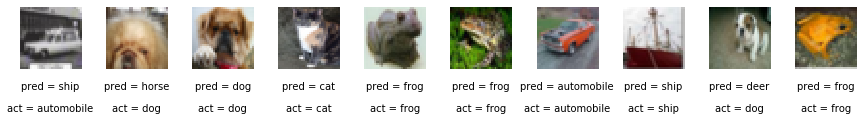

In [8]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)